In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = np.loadtxt('data/ex1data1.txt',delimiter=',')

In [3]:
X = data[:,0]
y = data[:,1]
print X[:5]
print y[:5]

[ 6.1101  5.5277  8.5186  7.0032  5.8598]
[ 17.592    9.1302  13.662   11.854    6.8233]


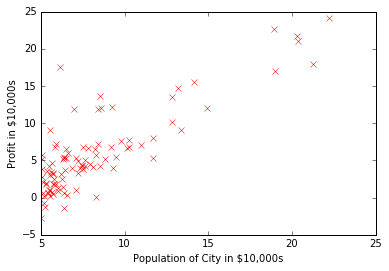

In [4]:
plt.plot(X, y,'rx')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in $10,000s')

為了模擬出$\theta _{0}x_{0} + \theta _{1}x_{1}$，所以新增一個$x _{0}$的column，並設為1

In [5]:
X = np.column_stack((np.ones(np.shape(X)[0]), X))
X[:5]

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598]])

In [6]:
theta = np.zeros(2, dtype=float)
theta

array([ 0.,  0.])

In [7]:
iterations = 1500;
alpha = 0.01;

Cost function: $$\frac{1}{2m}\sum_{i=1}^{m}(h(x^{(i)}) - y^{(i)})^{2}$$
其中 $$h_{\theta }(x) = x\cdot \theta = \theta _{0}x_{0} + \theta _{1}x_{1}$$

In [8]:
def computeCost(X, y, theta):
    H = np.dot(X, theta)
    J = np.sum(np.square(H - np.asmatrix(y).T)) / 2 / len(y)
    return J
J = computeCost(X, y, theta)
J

3111.0551861132003

接下來要計算函數最小值，theta在什麼時候cost function的J會最小$$\theta _{j} = \theta _{j} - \alpha ( \frac{1}{2m}\sum_{i=1}^{m}(h(x^{(i)}) - y^{(i)})^{2})' =\theta _{j} - \alpha  \frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)}) - y^{(i)})x_j^{(i)}$$
藉由微分的斜率來逼近我們的最低點，alpha只是用來控制要加減多少，太大會不準，太小會算太久

In [9]:
def gradientDescent(X, y, theta, alpha, iterations):
    print 'shape of X: ' + str(X.shape)
    print 'shape of Theta: ' + str(theta.shape)
    print 'shape of X dot theta: ' + str(np.dot(X, theta).shape)
    for iter in range(iterations):
        H = np.dot(X, theta)
        T = np.zeros(theta.shape,dtype=theta.dtype)
        for i in range(len(y)):
            T = T + (H[i] - y[i]) * X[i]
        theta = theta - alpha * T / len(y)
    return theta
theta = gradientDescent(X, y, theta, alpha, iterations)
theta

shape of X: (97, 2)
shape of Theta: (2,)
shape of X dot theta: (97,)


array([-3.63029144,  1.16636235])

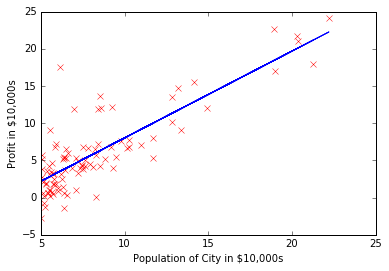

In [10]:
plt.plot(X[:,1], y,'rx')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in $10,000s')
plt.plot(X[:,1], np.dot(X,theta))

In [11]:
predict1 = np.dot(np.array([1, 3.5], dtype=float) * 10000, theta) # x = 35000

In [12]:
predict2 = np.dot(np.array([1, 7], dtype=float) * 10000, theta) # x = 70000

模擬各個theta所算出來的cost function值

In [13]:
theta0_vals = np.linspace(-10, 10, 100); 
theta1_vals = np.linspace(-1, 4, 100);

In [14]:
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

100種theta0配對100種theta1總共有10,000總組合

In [15]:
J_vals.shape

(100, 100)

In [16]:
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.row_stack((theta0_vals[i], theta1_vals[j]))
        J_vals[i,j] = computeCost(X, y, t)

會呈現一個碗狀，碗的最下面就是最低點

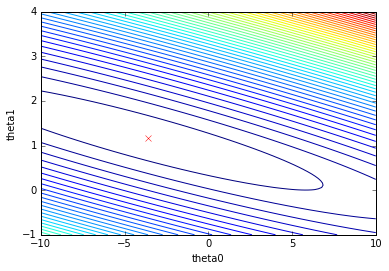

In [17]:
plt.contour(theta0_vals, theta1_vals, J_vals.T, 50)
plt.plot(theta[0], theta[1], 'rx')
plt.xlabel('theta0')
plt.ylabel('theta1')

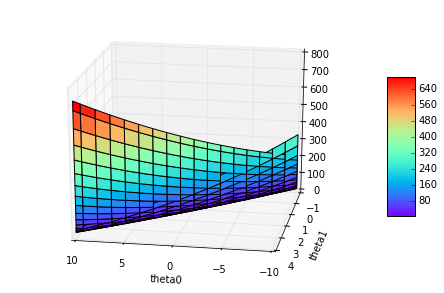

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d') 
ax.view_init(20, 100) #設置視角

surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals.T, rstride=6, cstride=6, cmap=plt.cm.rainbow, linewidth=1, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1') 